In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress

pd.set_option('display.max_rows', 800)

pd.set_option('display.max_columns', None)

In [2]:
#Read in data
Factbook_df = pd.read_csv('Resources/Factbookdata.csv')
Happy_df = pd.read_csv('Resources/cleanAndHappy.csv', index_col = 0)



In [3]:
Factbook_df.head()

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.8,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.0,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0


In [4]:
#Reformat country names before merging.
#Change _ to " " to match with Happy_df
Factbook_df['Country'] = Factbook_df['Country'].str.replace("_"," ")
Factbook_df.head(15)

,Country,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,world,86.2,12.0,43.0,83.0,NaN,17500.0,27.9,7.7,NaN,91.1,67.7,NaN,NaN,NaN,1.01,69.8,2.42,52.5,30.6,NaN,NaN,NaN,NaN,356000.0,NaN,NaN,NaN,840.0
1,afghanistan,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
2,akrotiri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,32.0,N,E,56.3,48.0,0.539789,NaN,NaN
3,albania,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
4,algeria,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0
5,american samoa,NaN,NaN,31.3,59.0,presidential democracy; a self-governing terri...,11200.0,NaN,29.8,NaN,100.0,62.5,NaN,NaN,-26.6,1.00,73.9,2.57,NaN,26.1,14.0,170.0,S,W,116.0,0.0,1.000000,78.10,NaN
6,andorra,100.0,NaN,97.9,100.0,parliamentary democracy (since March 1993) tha...,49900.0,NaN,3.7,NaN,100.0,100.0,25.6,NaN,0.0,1.06,82.9,1.41,NaN,44.9,42.0,1.0,N,E,0.0,118.0,0.000000,34.00,1996.0
7,angola,71.1,10.0,13.0,40.5,presidential republic,6800.0,28.6,6.6,36.6,49.0,51.6,8.2,19.0,0.1,0.95,60.6,6.09,97.6,15.9,12.0,18.0,S,E,1600.0,5369.0,0.229588,46.30,1112.0
8,anguilla,NaN,NaN,81.6,NaN,parliamentary democracy (House of Assembly); s...,12200.0,NaN,8.0,23.0,94.6,97.9,NaN,NaN,11.5,0.90,81.6,1.74,NaN,35.1,18.0,63.0,N,W,61.0,0.0,1.000000,61.10,NaN
9,antarctica,NaN,NaN,100.0,NaN,Antarctic Treaty Summary - the Antarctic regio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,S,E,17968.0,NaN,NaN,NaN,2300.0


In [5]:
#Change to all lowercase to match Factbook_df
Happy_df.Country = Happy_df.Country.str.lower()
Happy_df.head()

,Overall Rank,Country,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,1,switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [6]:
#Create GB on country to get mean over all years
Happy_dfgb = Happy_df.groupby('Country')
Happydfgb =  Happy_dfgb.mean().reset_index(drop = False)
Happydfgb

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,afghanistan,148.250000,3.590250,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367,2016.500000
1,albania,106.250000,4.711000,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251,2016.500000
2,algeria,60.750000,5.781750,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124,2016.500000
3,angola,140.000000,3.872250,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.500000
4,argentina,27.250000,6.552750,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885,2016.500000
5,armenia,124.500000,4.351750,0.836417,0.849841,0.668564,0.199286,0.079242,0.032459,2016.500000
6,australia,9.750000,7.288250,1.400606,1.374258,0.884162,0.617054,0.437097,0.320716,2016.500000
7,austria,12.500000,7.116000,1.403927,1.336204,0.850600,0.588162,0.304501,0.211325,2016.500000
8,azerbaijan,83.250000,5.234500,1.081305,1.002938,0.582316,0.387931,0.052665,0.174194,2016.500000
9,bahrain,43.750000,6.092500,1.397603,1.212330,0.688813,0.514854,0.190190,0.235941,2016.500000


In [7]:
#Merge factbook data with anual average happiness ratings
merge_df = pd.merge(Happydfgb,Factbook_df, on='Country', how='inner' ) 
merge_df.head(15)
merge_df = merge_df.sort_values("Overall Rank")
merge_df.head()


,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
35,denmark,2.25,7.53250,1.400161,1.416360,0.832561,0.634449,0.335595,0.434218,2016.5,NaN,19.0,97.0,100.0,parliamentary constitutional monarchy,50100.0,28.8,5.7,13.4,100.0,99.6,19.7,NaN,4.3,0.99,81.0,1.78,56.0,41.9,56.0,10.0,N,E,7314.0,140.0,0.981218,12.9,34.0
100,norway,2.75,7.53775,1.527226,1.393343,0.834667,0.646811,0.343488,0.344688,2016.5,NaN,18.0,97.3,100.0,parliamentary constitutional monarchy,72100.0,34.3,4.2,NaN,100.0,98.1,23.1,NaN,5.3,1.02,82.0,1.85,52.1,39.3,62.0,10.0,N,E,25148.0,2566.0,0.907411,27.8,460.0
56,iceland,3.00,7.51525,1.388153,1.460016,0.890681,0.624793,0.435405,0.145682,2016.5,NaN,19.0,98.2,100.0,unitary parliamentary republic,52200.0,25.8,2.8,NaN,100.0,98.8,21.9,NaN,3.7,1.00,83.1,1.99,51.6,36.7,65.0,18.0,N,W,4970.0,0.0,1.000000,0.3,557.0
129,switzerland,3.00,7.51925,1.477205,1.390165,0.897398,0.632803,0.281040,0.388954,2016.5,NaN,16.0,89.4,100.0,federal republic (formally a confederation),62100.0,33.8,3.2,6.6,100.0,99.9,19.5,NaN,4.6,0.97,82.7,1.56,48.8,42.5,47.0,8.0,N,E,0.0,1770.0,0.000000,31.5,1350.0
43,finland,4.25,7.48000,1.361200,1.396287,0.845794,0.627920,0.233978,0.399843,2016.5,NaN,19.0,87.7,100.0,parliamentary republic,44500.0,23.3,8.5,NaN,100.0,97.6,22.2,NaN,2.8,0.97,81.1,1.75,57.9,42.6,64.0,26.0,N,E,1250.0,2563.0,0.327826,72.9,164.0


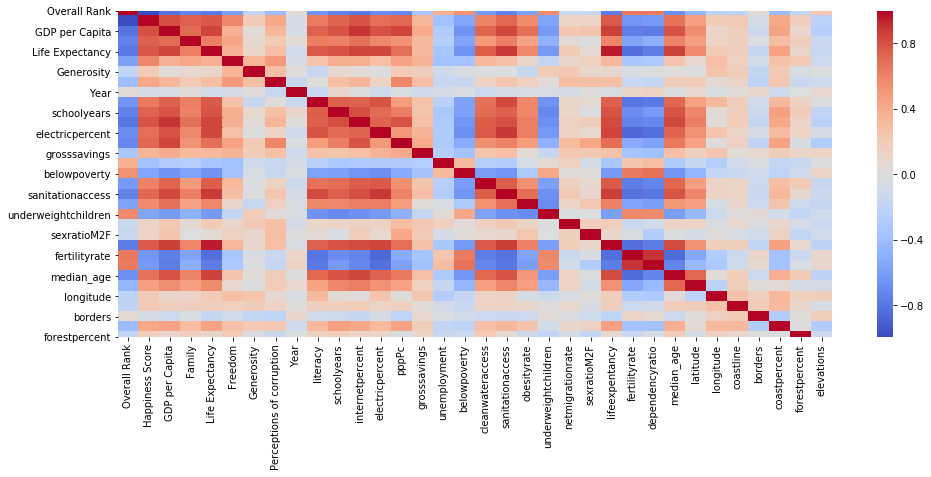

In [8]:
#Heatmap of correlations
heat= merge_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [9]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 35 to 22
Data columns (total 38 columns):
Country                      152 non-null object
Overall Rank                 152 non-null float64
Happiness Score              152 non-null float64
GDP per Capita               152 non-null float64
Family                       152 non-null float64
Life Expectancy              152 non-null float64
Freedom                      152 non-null float64
Generosity                   152 non-null float64
Perceptions of corruption    152 non-null float64
Year                         152 non-null float64
literacy                     127 non-null float64
schoolyears                  133 non-null float64
internetpercent              150 non-null float64
electricpercent              151 non-null float64
governmenttype               152 non-null object
pppPc                        151 non-null float64
grosssavings                 150 non-null float64
unemployment                 147 non-null float

In [10]:
#Delete column underweightchildren, and remove rows with NaN values in order to plot correlations.
del merge_df["underweightchildren"]


In [11]:
#delete columns from Happiness report other than Happiness Score
del merge_df["GDP per Capita"]
del merge_df["Family"]
del merge_df["Life Expectancy"]
del merge_df["Freedom"]
del merge_df["Generosity"]
del merge_df["Perceptions of corruption"]
del merge_df["Year"]
del merge_df["Overall Rank"]

In [12]:
merge_df.dropna(how='any', inplace=True)
merge_df

,Country,Happiness Score,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
32,costa rica,7.116000,97.8,15.0,66.0,100.0,presidential republic,16900.0,15.1,8.1,21.7,97.8,94.5,25.7,0.8,1.01,78.90,1.89,45.4,31.7,10.0,84.0,N,W,1290.0,661.00,0.661199,51.50,746.0
62,israel,7.143000,97.8,16.0,79.8,100.0,parliamentary democracy,36400.0,23.6,4.2,22.0,100.0,100.0,26.1,2.1,1.01,82.70,2.63,64.2,30.1,31.0,34.0,N,E,273.0,1065.00,0.204036,7.10,508.0
19,brazil,6.747250,92.0,15.0,59.7,100.0,federal presidential republic,15600.0,15.0,12.8,4.2,98.1,82.8,22.1,-0.1,0.97,74.30,1.75,43.8,32.4,10.0,55.0,S,W,7491.0,16145.00,0.316932,61.90,320.0
87,mexico,6.757750,94.9,14.0,59.5,100.0,federal presidential republic,19900.0,21.4,3.4,46.2,96.1,85.2,28.9,-1.8,0.96,76.30,2.22,51.4,28.6,23.0,102.0,N,W,9330.0,4389.00,0.680079,33.30,1111.0
142,united arab emirates,6.724000,93.8,14.0,90.6,100.0,federation of monarchies,68600.0,28.5,1.6,19.5,99.6,97.6,31.7,6.3,2.64,78.70,1.73,17.4,37.2,24.0,54.0,N,E,1318.0,1066.00,0.552852,3.80,149.0
28,chile,6.625750,96.9,16.0,66.0,100.0,presidential republic,24600.0,20.5,6.7,14.4,99.0,99.1,28.0,0.3,0.97,79.10,1.79,45.5,34.8,30.0,71.0,S,W,6435.0,7801.00,0.452023,21.90,1871.0
103,panama,6.592250,95.0,13.0,54.0,93.4,presidential republic,25400.0,38.9,6.0,23.0,94.7,75.0,22.7,-0.2,1.01,78.90,2.28,54.8,29.5,9.0,80.0,N,W,2490.0,687.00,0.783758,43.60,360.0
4,argentina,6.552750,99.1,18.0,70.2,100.0,presidential republic,20900.0,17.6,8.4,25.7,99.1,96.4,28.3,-0.1,0.98,77.50,2.25,56.5,31.9,34.0,64.0,S,W,4989.0,11968.00,0.294215,10.70,595.0
30,colombia,6.393750,94.7,15.0,58.1,99.0,presidential republic,14400.0,18.9,9.3,28.0,91.4,81.1,22.3,-0.6,0.98,76.20,1.98,45.6,30.4,4.0,72.0,N,W,3208.0,6672.00,0.324696,54.40,593.0
50,guatemala,6.320750,81.5,11.0,34.5,91.8,presidential republic,8200.0,13.6,2.3,59.3,92.8,63.9,21.2,-2.4,0.99,71.80,2.87,68.7,22.5,15.0,90.0,N,W,400.0,1667.00,0.193517,33.60,759.0


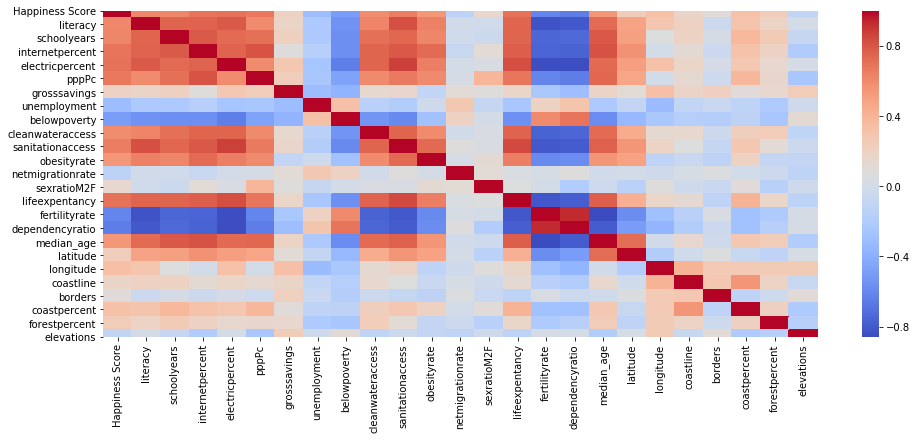

In [13]:
#new heatmap
heat= merge_df.corr();
plt.figure(figsize=(16, 6))
sns.heatmap(heat, cmap='coolwarm')

In [14]:
#calculate correlation between Happiness and other variables. Sort by ascending value.
correlation_df = pd.DataFrame(merge_df.corr().reset_index())
correlation_df = correlation_df[['index', 'Happiness Score']]
correlation_df = correlation_df.sort_values(by='Happiness Score', ascending = True)
correlation_df

,index,Happiness Score
16,dependencyratio,-0.639643
15,fertilityrate,-0.603805
8,belowpoverty,-0.489102
7,unemployment,-0.310634
12,netmigrationrate,-0.131702
24,elevations,-0.108884
21,borders,0.097618
13,sexratioM2F,0.151175
20,coastline,0.175653
6,grosssavings,0.207118


In [15]:
len(correlation_df)

25

In [16]:
#Grab columns to plot against Happiness Score
merge_df.columns


Index(['Country', 'Happiness Score', 'literacy', 'schoolyears',
       'internetpercent', 'electricpercent', 'governmenttype', 'pppPc',
       'grosssavings', 'unemployment', 'belowpoverty', 'cleanwateraccess',
       'sanitationaccess', 'obesityrate', 'netmigrationrate', 'sexratioM2F',
       'lifeexpentancy', 'fertilityrate', 'dependencyratio', 'median_age',
       'latitude', 'longitude', 'NSHemi', 'EWHemi', 'coastline', 'borders',
       'coastpercent', 'forestpercent', 'elevations'],
      dtype='object')

In [17]:
columns = ['literacy', 'schoolyears',
       'internetpercent', 'electricpercent', 'pppPc',
       'grosssavings', 'unemployment', 'belowpoverty', 'cleanwateraccess',
       'sanitationaccess', 'obesityrate', 'netmigrationrate', 'sexratioM2F',
       'lifeexpentancy', 'fertilityrate', 'dependencyratio', 'median_age',
       'latitude', 'longitude','coastline', 'borders',
       'coastpercent', 'forestpercent', 'elevations']

Regression Line:  y = x * 0.029357283598821508 + 2.6027094395107984
R^2: 0.37719257897151093


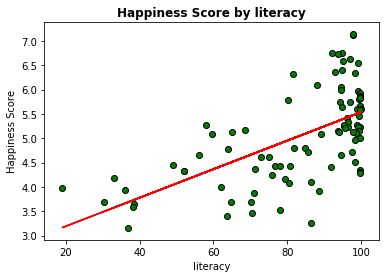

Regression Line:  y = x * 0.21120491288371082 + 2.3430150342900737
R^2: 0.3873738663678704


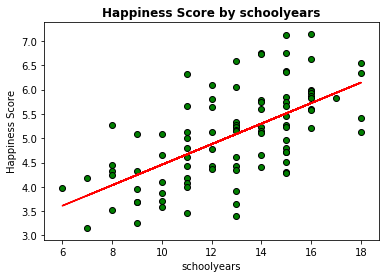

Regression Line:  y = x * 0.027435757244903537 + 3.8213895310013317
R^2: 0.4830955367185815


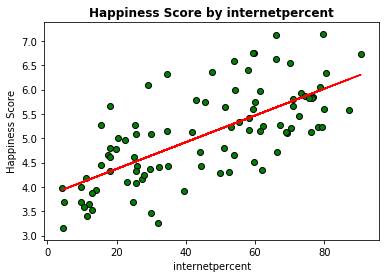

Regression Line:  y = x * 0.023978145564677558 + 3.1019518374812343
R^2: 0.48565788397513576


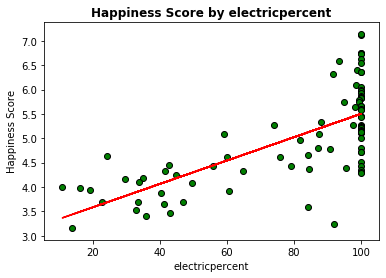

Regression Line:  y = x * 5.465506975996548e-05 + 4.298102904029182
R^2: 0.4557889204435846


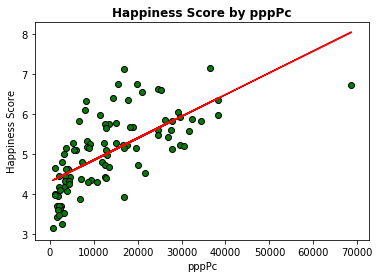

Regression Line:  y = x * 0.02141043848858902 + 4.599132003607984
R^2: 0.04289794901657568


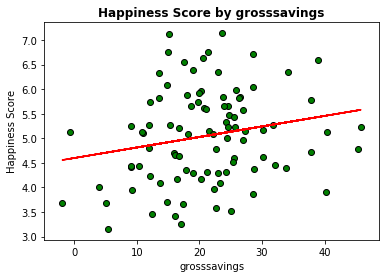

Regression Line:  y = x * -0.025354222005852287 + 5.335339650090629
R^2: 0.0964937526504814


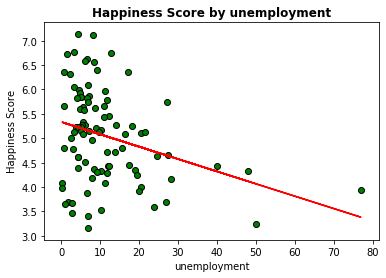

Regression Line:  y = x * -0.027173043220574445 + 5.7939251681150195
R^2: 0.2392204288734774


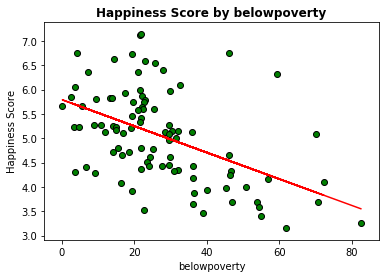

Regression Line:  y = x * 0.03809873492432558 + 1.747646195210737
R^2: 0.35113985986079854


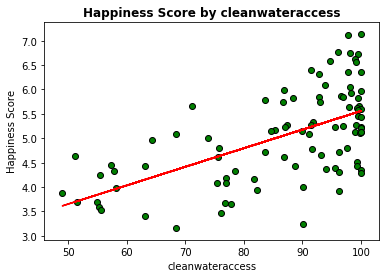

Regression Line:  y = x * 0.02189641821837801 + 3.5184784032926593
R^2: 0.433781649325783


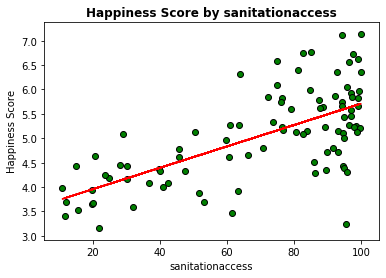

Regression Line:  y = x * 0.059542246335849 + 4.011153355960398
R^2: 0.30155399135900884


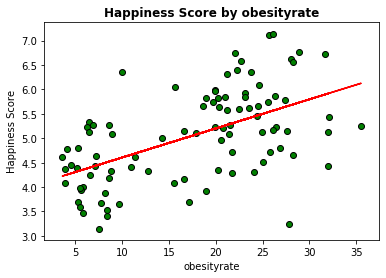

Regression Line:  y = x * -0.01625709746056181 + 5.039500080419073
R^2: 0.01734534840135919


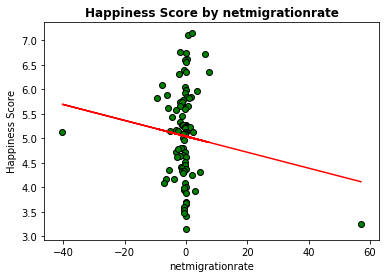

Regression Line:  y = x * 0.8047225551384085 + 4.2516667194486555
R^2: 0.022853902398491388


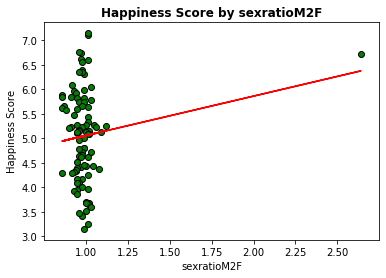

Regression Line:  y = x * 0.09085341662628085 + -1.4048172920705317
R^2: 0.485205860116502


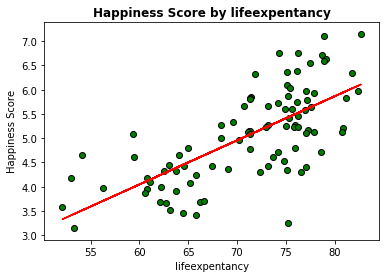

Regression Line:  y = x * -0.447672533600549 + 6.2479586712410695
R^2: 0.36458052363407983


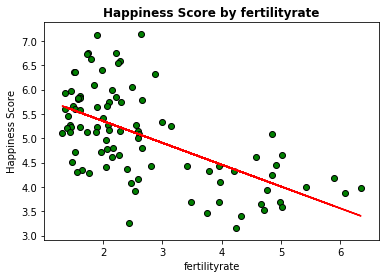

Regression Line:  y = x * -0.034326671416843306 + 7.119723235792972
R^2: 0.40914350061751564


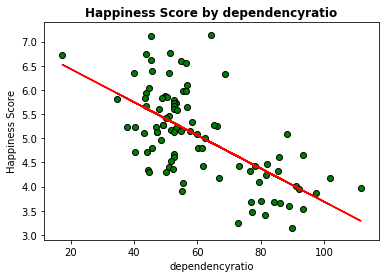

Regression Line:  y = x * 0.05990099609360027 + 3.3064711397784388
R^2: 0.3019603408773255


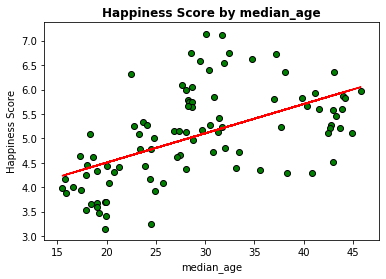

Regression Line:  y = x * 0.014297630910325184 + 4.674028688777486
R^2: 0.05643895445765728


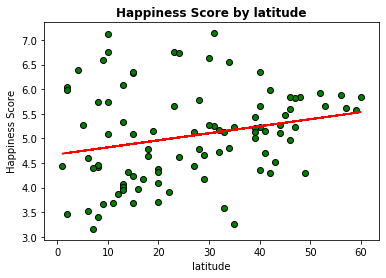

Regression Line:  y = x * 0.009729621100699823 + 4.599814499741399
R^2: 0.11516445500091828


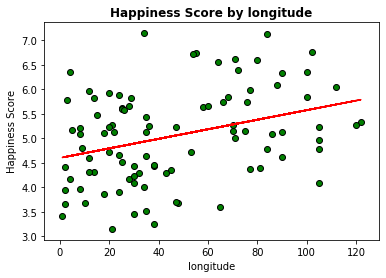

Regression Line:  y = x * 2.1043311138408056e-05 + 4.986042814407151
R^2: 0.030854029161987432


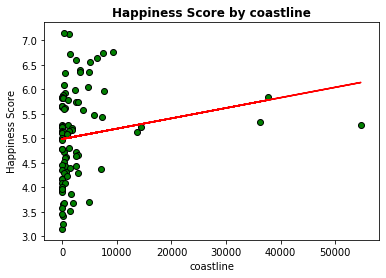

Regression Line:  y = x * 2.2938396659198424e-05 + 4.957792905188202
R^2: 0.00952934353252367


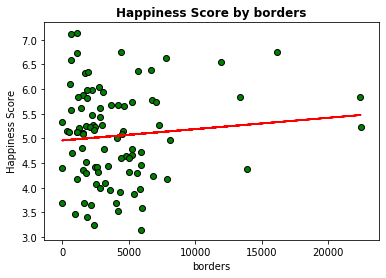

Regression Line:  y = x * 1.0420636843981983 + 4.766480843534007
R^2: 0.103048422096596


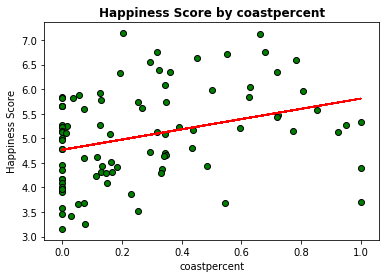

Regression Line:  y = x * 0.012122304294669603 + 4.726405359347624
R^2: 0.0618001837522603


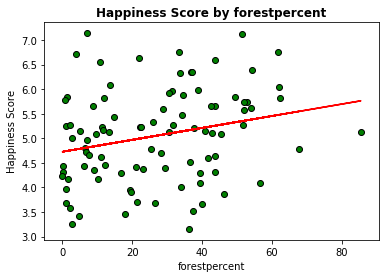

Regression Line:  y = x * -0.00016117276291333074 + 5.16877793276402
R^2: 0.011855707272000643


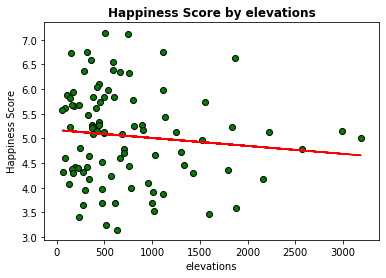

In [18]:
#loop through columns and make scatter plots with regression lines
for column in columns:
    y= merge_df['Happiness Score']
    x= merge_df[f'{column}']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x,regress_values,"r-")
    plt.scatter(x,y, facecolors="green", edgecolors="black")
    plt.xlabel(f'{column}')
    plt.ylabel("Happiness Score")
    plt.title(f"Happiness Score by {column}", fontweight='bold')
    print(f"Regression Line:  y = x * {slope} + {intercept}")
    print(f"R^2: {rvalue ** 2}")
    plt.savefig(f'Images/{column}.png')
    plt.show()
    plt.close()

In [19]:
#Multi variable regression for modeling
from sklearn import linear_model
import statsmodels.api as sm

In [20]:
#define variables
x_model= merge_df[[
       'electricpercent', 'pppPc', 'grosssavings', 'unemployment', 'cleanwateraccess',
       'sexratioM2F','dependencyratio', 'median_age', 'forestpercent']]
y_model= merge_df[['Happiness Score']]


In [21]:
#Create sample model to explore which variables to keep
x_model= sm.add_constant(x_model)
model = sm.OLS(y_model, x_model).fit()
predictions = model.predict(x_model)
model.summary()


C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     18.97
Date:                Fri, 15 May 2020   Prob (F-statistic):           7.35e-17
Time:                        11:55:50   Log-Likelihood:                -75.847
No. Observations:                  94   AIC:                             171.7
Df Residuals:                      84   BIC:                             197.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4467      1.414      4.559      0.000       3.634       9.259
electricpercent      0.0159      0.004      3.564      0.001       0.007       0.025
pppPc             5.735e-05   1.03e-05      5.576      0.000    3.69e-05    7.78e-05
grosssavings        -0.0095      0.007     -1.320      0.190      -0.024       0.005
unemployment        -0.0078      0.006     -1.375      0.173      -0.019       0.003
cleanwateraccess     0.0026      0.007      0.370      0.712      -0.011       0.016
sexratioM2F         -1.0254      0.485     -2.116      0.037      -1.989      -0.062
dependencyratio     -0.0124      0.008     -1.516      0.133      -0.029       0.004
median_age          -0.0625      0.017     -3.752      0.000      -0.096      -0.029
forestpercent        0.0063      0.003      1.897      0.061      -0.000       0.013
==============================================================================
Omnibus:                        3.607   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.272
Skew:                           0.166   Prob(JB):                        0.321
Kurtosis:                       2.314   Cond. No.                     4.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Find a country without Happiness scores to predict
#Create new merged df to explore
merge_df2 = pd.merge(Happydfgb,Factbook_df, on='Country', how='outer')
merge_df2.head()

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
0,afghanistan,148.25,3.59025,0.358892,0.382941,0.228134,0.147405,0.295163,0.066367,2016.5,38.2,10.0,10.6,84.1,presidential Islamic republic,2000.0,22.7,23.9,54.5,55.3,31.9,5.5,25.0,-0.6,1.03,52.1,5.02,88.8,19.0,33.0,65.0,N,E,0.0,5987.0,0.000000,2.07,1884.0
1,albania,106.25,4.71100,0.936541,0.731664,0.766120,0.369122,0.165358,0.047251,2016.5,97.6,15.0,66.4,100.0,parliamentary republic,12500.0,15.9,13.8,14.3,83.6,93.2,21.7,1.5,-3.3,0.98,78.6,1.52,44.0,33.4,41.0,20.0,N,E,362.0,691.0,0.343780,28.12,708.0
2,algeria,60.75,5.78175,1.015704,1.052757,0.635071,0.201546,0.068274,0.154124,2016.5,80.2,14.0,42.9,99.4,presidential republic,15200.0,37.8,11.7,23.0,83.6,87.6,27.4,3.0,-0.9,1.03,77.2,2.66,52.7,28.3,28.0,3.0,N,E,998.0,6734.0,0.129074,0.80,800.0
3,angola,140.00,3.87225,0.798380,0.938368,0.133902,0.027433,0.105269,0.071570,2016.5,71.1,10.0,13.0,40.5,presidential republic,6800.0,28.6,6.6,36.6,49.0,51.6,8.2,19.0,0.1,0.95,60.6,6.09,97.6,15.9,12.0,18.0,S,E,1600.0,5369.0,0.229588,46.30,1112.0
4,argentina,27.25,6.55275,1.115794,1.305700,0.730869,0.484275,0.098964,0.067885,2016.5,99.1,18.0,70.2,100.0,presidential republic,20900.0,17.6,8.4,25.7,99.1,96.4,28.3,NaN,-0.1,0.98,77.5,2.25,56.5,31.9,34.0,64.0,S,W,4989.0,11968.0,0.294215,10.70,595.0


In [23]:
#Quick glane to find a test country.
merge_df2.tail(100)

,Country,Overall Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Perceptions of corruption,Year,literacy,schoolyears,internetpercent,electricpercent,governmenttype,pppPc,grosssavings,unemployment,belowpoverty,cleanwateraccess,sanitationaccess,obesityrate,underweightchildren,netmigrationrate,sexratioM2F,lifeexpentancy,fertilityrate,dependencyratio,median_age,latitude,longitude,NSHemi,EWHemi,coastline,borders,coastpercent,forestpercent,elevations
169,arctic ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,0.0,N,E,45389.0,NaN,NaN,NaN,NaN
170,aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.5,14.0,93.5,95.6,parliamentary democracy (Legislature); part of...,37500.0,17.0,7.7,NaN,98.1,97.7,NaN,NaN,8.6,0.90,77.1,1.83,44.6,39.5,12.0,69.0,N,W,68.5,0.0,1.000000,2.3,NaN
171,ashmore and cartier islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,123.0,S,E,74.1,0.0,1.000000,NaN,NaN
172,atlantic ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,N,W,111866.0,NaN,NaN,NaN,NaN
173,bahamas the,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,100.0,parliamentary democracy (Parliament) under a c...,32400.0,11.4,10.1,9.3,98.4,92.0,31.6,NaN,0.0,0.96,72.9,1.94,40.8,32.3,24.0,76.0,N,W,3542.0,0.0,1.000000,51.4,NaN
174,barbados,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.6,15.0,79.5,100.0,parliamentary democracy under a constitutional...,18600.0,7.2,10.1,NaN,99.7,96.2,23.1,3.5,-0.3,0.94,75.7,1.68,50.4,38.9,13.0,59.0,N,W,97.0,0.0,1.000000,19.4,NaN
175,bermuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,98.0,100.0,parliamentary democracy (Parliament); self-gov...,99400.0,NaN,7.0,11.0,NaN,NaN,NaN,NaN,1.7,0.94,81.5,1.92,NaN,43.5,32.0,64.0,N,W,103.0,0.0,1.000000,20.0,NaN
176,bouvet island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,3.0,S,E,29.6,0.0,1.000000,0.0,NaN
177,british indian ocean territory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,0.0,1.000000,0.0,NaN
178,british virgin islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,43.6,NaN,parliamentary democracy (House of Assembly); s...,34200.0,NaN,2.9,NaN,98.0,97.5,NaN,NaN,16.1,0.91,78.9,1.30,NaN,36.7,18.0,64.0,N,W,80.0,0.0,1.000000,24.3,NaN


In [24]:
#Picked Barbados, because I went there for my honeymoon, and my anniversary is next week
barbados = merge_df2.loc[merge_df2['Country'] =='barbados']
barbadospredict = barbados[['electricpercent', 'pppPc', 'grosssavings', 'unemployment', 'sexratioM2F', 'dependencyratio', 'median_age', 'forestpercent']]
barbadospredict

,electricpercent,pppPc,grosssavings,unemployment,sexratioM2F,dependencyratio,median_age,forestpercent
174,100.0,18600.0,7.2,10.1,0.94,50.4,38.9,19.4


In [25]:
#Dataframe with just modeling variables
final_df = merge_df[[
       'electricpercent', 'pppPc', 'grosssavings', 'unemployment',
       'sexratioM2F', 'dependencyratio', 'median_age', 'forestpercent']]
final_df.head()

,electricpercent,pppPc,grosssavings,unemployment,sexratioM2F,dependencyratio,median_age,forestpercent
32,100.0,16900.0,15.1,8.1,1.01,45.4,31.7,51.5
62,100.0,36400.0,23.6,4.2,1.01,64.2,30.1,7.1
19,100.0,15600.0,15.0,12.8,0.97,43.8,32.4,61.9
87,100.0,19900.0,21.4,3.4,0.96,51.4,28.6,33.3
142,100.0,68600.0,28.5,1.6,2.64,17.4,37.2,3.8


In [26]:
x_model= final_df
y_model= merge_df[['Happiness Score']]


In [27]:
x_model= sm.add_constant(x_model)
model = sm.OLS(y_model, x_model).fit()
predictions = model.predict(x_model)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     21.55
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.62e-17
Time:                        11:55:51   Log-Likelihood:                -75.924
No. Observations:                  94   AIC:                             169.8
Df Residuals:                      85   BIC:                             192.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.6541      1.292      5.151      0.000       4.085       9.223
electricpercent     0.0164      0.004      3.853      0.000       0.008       0.025
pppPc            5.787e-05   1.01e-05      5.708      0.000    3.77e-05     7.8e-05
grosssavings       -0.0099      0.007     -1.393      0.167      -0.024       0.004
unemployment       -0.0075      0.006     -1.345      0.182      -0.019       0.004
sexratioM2F        -1.0374      0.481     -2.156      0.034      -1.994      -0.081
dependencyratio    -0.0130      0.008     -1.631      0.107      -0.029       0.003
median_age         -0.0619      0.016     -3.753      0.000      -0.095      -0.029
forestpercent       0.0065      0.003      1.996      0.049    2.55e-05       0.013
==============================================================================
Omnibus:                        4.374   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.598
Skew:                           0.187   Prob(JB):                        0.273
Kurtosis:                       2.277   Cond. No.                     4.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
barbadospredict= sm.add_constant(barbadospredict, has_constant='add')
model.predict(barbadospredict)


174    5.312718
dtype: float64

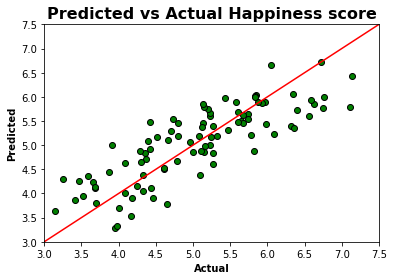

In [29]:
#Predictions vs Actual Happiness Scores
residual= merge_df["Happiness Score"]- predictions 
plt.scatter(merge_df["Happiness Score"], predictions, facecolor="green", edgecolor="black")
plt.title('Predicted vs Actual Happiness score', fontweight="bold", fontsize=16)
plt.xlabel('Actual', fontweight='bold')
plt.ylabel('Predicted', fontweight ='bold')
plt.xlim(3,7.5)
plt.ylim(3,7.5)
plt.plot([3,7.5],[3,7.5], color="red")
plt.savefig('Images/Predicted_Actual.png')

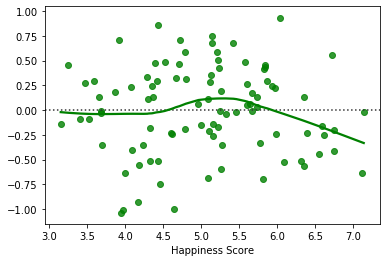

In [30]:
sns.residplot(merge_df["Happiness Score"], predictions, lowess=True, color="g")
plt.savefig('Images/Residuals.png')